## Version 2.5 – Base PDE System Refactor  
In this version, we introduced a modular base class `BasePDESystem` that centralizes the `.evolve()` logic.  
All future PDE systems (explicit, linear, nonlinear) will now inherit from this base.  

This notebook tests:
- That `ExplicitPDESystem2D` still works with a manual RHS
- That `LinearPDESystem2D` still works and benefits from the shared base
- That `make_linear_rhs` is unaffected

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath("../src"))

from core.base_pde_system import BasePDESystem
from core.pde_systems import ExplicitPDESystem2D, LinearPDESystem2D, make_linear_rhs
from numerics.laplacian_2d import make_laplacian_2d

In [2]:
# Grid and initial condition
N = 64
L = 10.0
dx = dy = L / N
x = np.linspace(-L/2, L/2, N, endpoint=False)
y = x.copy()
X, Y = np.meshgrid(x, y, indexing="ij")
u0 = np.exp(-(X**2 + Y**2) / 2).astype(float) 

## Test 1 – LinearPDESystem2D (inherits from BasePDESystem)  
We use the new `LinearPDESystem2D` which now internally builds a linear RHS  
and inherits the `.evolve()` method from the base class.

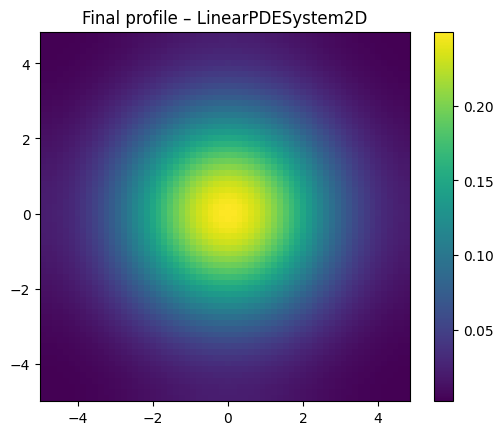

In [3]:
L_op = make_laplacian_2d(N, N, dx, dy)
system1 = LinearPDESystem2D(L_op, alpha=1.0)

u_hist1 = system1.evolve(u0, dt=0.005, steps=300)

plt.imshow(u_hist1[-1], extent=[x.min(), x.max(), y.min(), y.max()], origin="lower")
plt.title("Final profile – LinearPDESystem2D")
plt.colorbar()
plt.show()

## Test 2 – ExplicitPDESystem2D with Custom RHS  
Here we generate a linear RHS using `make_linear_rhs(...)`  
and pass it to `ExplicitPDESystem2D`.  
This ensures we still support manual RHS specification.

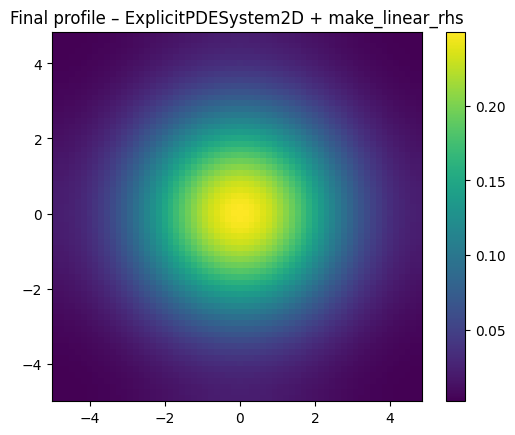

In [4]:
rhs = make_linear_rhs(L_op, alpha=1.0)
system2 = ExplicitPDESystem2D(rhs)

u_hist2 = system2.evolve(u0, dt=0.005, steps=300)

plt.imshow(u_hist2[-1], extent=[x.min(), x.max(), y.min(), y.max()], origin="lower")
plt.title("Final profile – ExplicitPDESystem2D + make_linear_rhs")
plt.colorbar()
plt.show()

## Summary of v2.5  
- Refactored PDE systems using object-oriented inheritance.  
- Reduced code duplication by isolating `.evolve()` into a shared `BasePDESystem`.  
- Confirmed that both `LinearPDESystem2D` and `ExplicitPDESystem2D` behave identically to previous versions.  

This prepares the tool for modular PDE types, boundary conditions, and time-steppers in future versions.